In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:

dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)

C:\Users\Rojan\AppData\Local\Temp\ipykernel_18572\3778056745.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1)


In [3]:
dataset.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
dataset.info()

In [4]:
#default column is not required so we remove it
dataset.drop(["default"],axis=1,inplace=True)

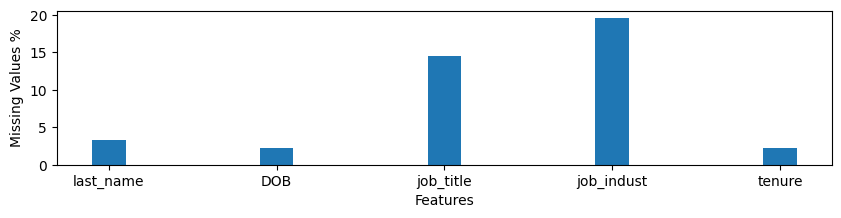

In [20]:
x = []
y= []
fig = plt.figure(figsize = ( 10, 2))

for col in dataset.columns:
    z = dataset[col].isna().sum()
    if z > 0:
        x.append(col[:10])
        y.append(z * 100 / dataset[col].count())

plt.bar(x,y,width=0.2)
plt.xlabel("Features")
plt.ylabel("Missing Values %")

plt.show()

In [ ]:
###Exploratory Data Analysis and Data Cleaning

# No changes in customer_id, First Name and Last Name
##Gender

dataset["gender"].value_counts()


In [6]:
def gen(x):
    if x[0]=="M" or x[0]=="m":
        return 'M'
    elif x[0]=="F" or x[0] =="f":
        return 'F'
    else :
        return "U"
 

In [7]:
## remove the gender that have 'U' 
dataset['gender'] = dataset['gender'].apply(gen)
dataset['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [8]:
dataset = dataset[dataset['gender']!="U"]

<AxesSubplot:>

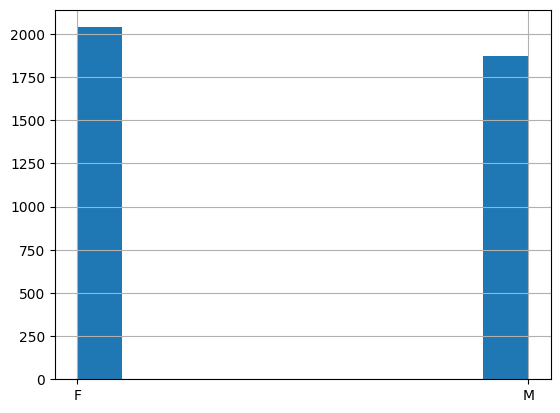

In [9]:
dataset["gender"].hist()

In [10]:
##past_3_years_bike_related_purchases
## no Nan values 
## nothing unusual in the dataset 
dataset["past_3_years_bike_related_purchases"].describe()

count    3912.000000
mean       49.039366
std        28.768226
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [31]:
today = pd.Timestamp.now()

In [33]:
today.year

2023

In [36]:
##DOB
dataset["age"] =  today.year - dataset["DOB"].dt.year 

In [38]:
dataset['age'].describe()

count    3912.000000
mean       45.935072
std        12.617249
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        92.000000
Name: age, dtype: float64

<AxesSubplot:>

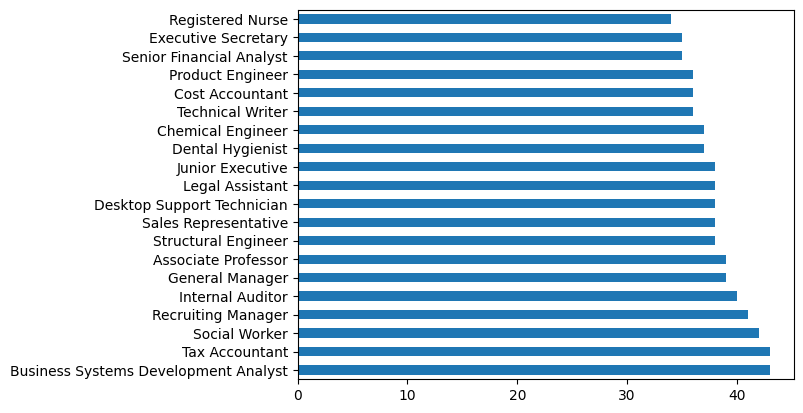

In [43]:
#job_title	job_industry_category	wealth_segment	deceased_indicator	default	owns_car	tenure

dataset["job_title"].value_counts().nlargest(n=20).plot.barh()

<AxesSubplot:>

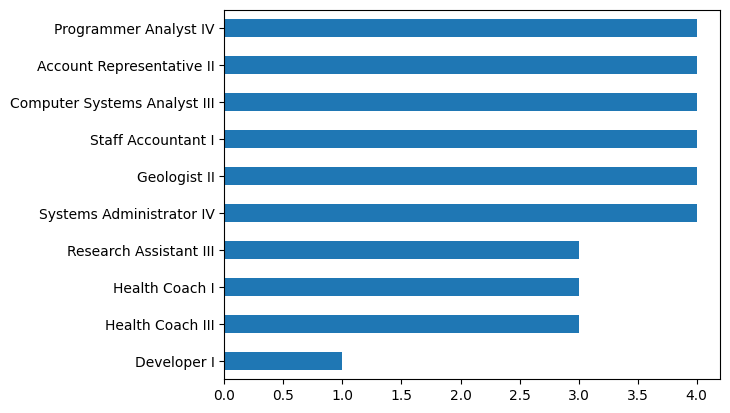

In [44]:
dataset["job_title"].value_counts().nsmallest(n=10).plot.barh()

<AxesSubplot:>

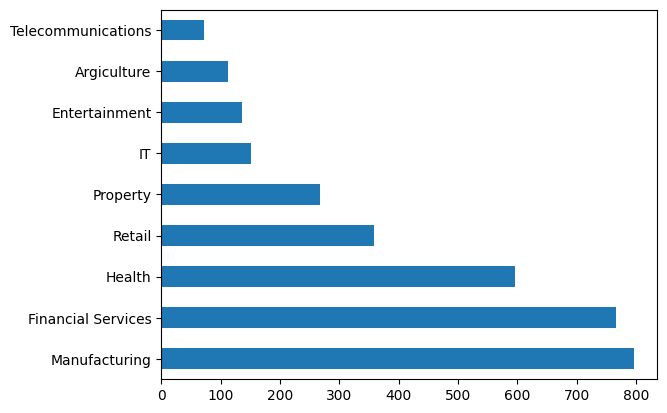

In [47]:
dataset["job_industry_category"].value_counts().plot.barh()

<AxesSubplot:>

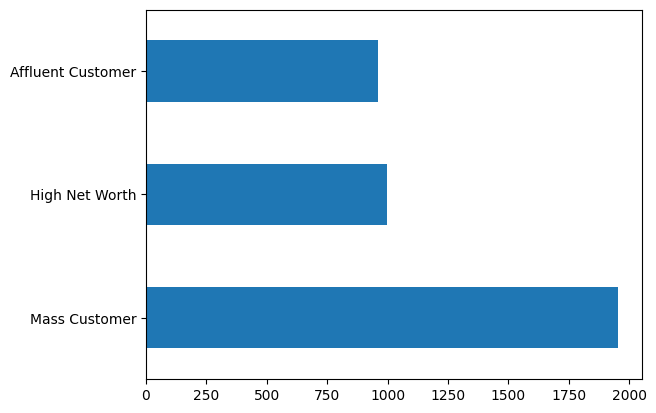

In [51]:
dataset["wealth_segment"].value_counts().plot.barh()

In [54]:
#deceased_indicator	default	owns_car	tenure

dataset["deceased_indicator"].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

In [56]:
dataset["owns_car"].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

In [58]:
df = dataset[["wealth_segment","owns_car"]].copy()

In [59]:
df

,wealth_segment,owns_car
0,Mass Customer,Yes
1,Mass Customer,Yes
2,Mass Customer,Yes
3,Mass Customer,No
4,Affluent Customer,Yes
...,...,...
3994,Mass Customer,Yes
3995,Mass Customer,No
3996,High Net Worth,Yes
3998,Affluent Customer,Yes


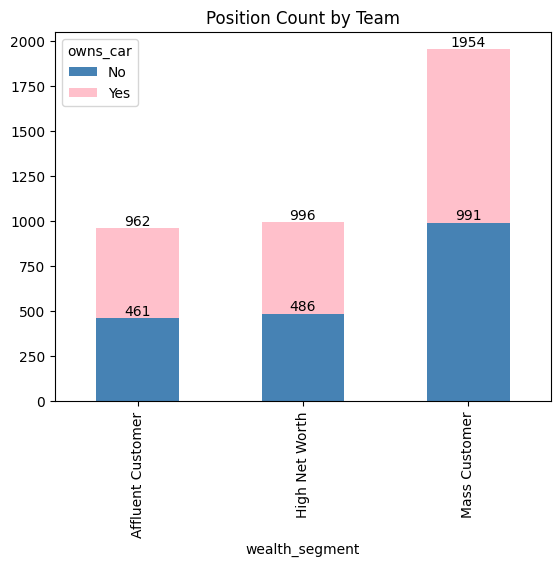

In [69]:
ax = df.groupby(['wealth_segment','owns_car']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','pink'], title='Position Count by Team')
for container in ax.containers:
    ax.bar_label(container)


Text(0, 0.5, 'In Years')

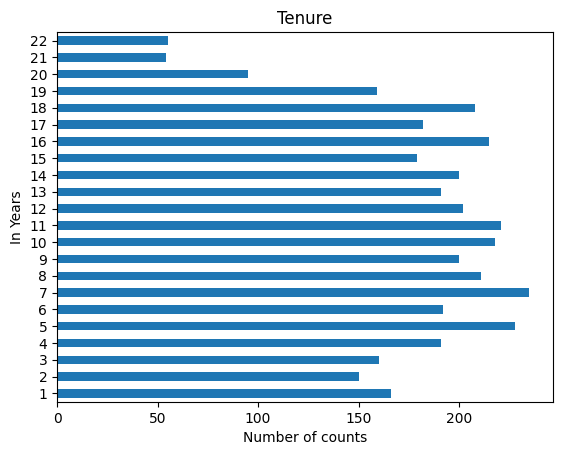

In [94]:
ax = dataset['tenure'].astype('int').value_counts().sort_index().plot.barh(title="Tenure")
ax.set_xlabel("Number of counts")
ax.set_ylabel("In Years")

<AxesSubplot:title={'center':'Total past 3 year bike per industry'}, ylabel='job_industry_category'>

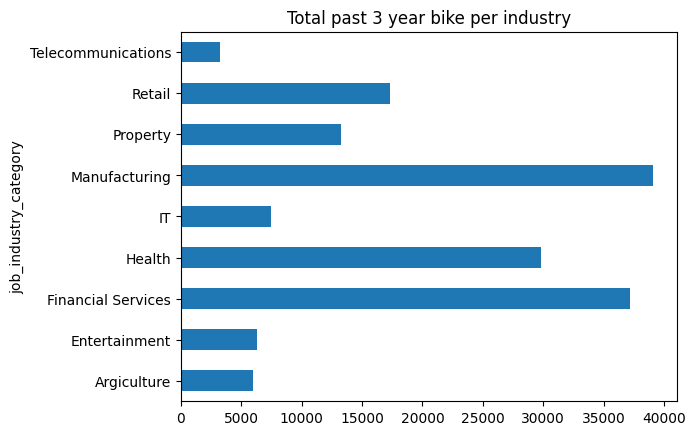

In [100]:
dataset.groupby("job_industry_category")["past_3_years_bike_related_purchases"].sum().plot.barh(title="Total past 3 year bike per industry")